In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Rotten Tomatoes

In [2]:
rt = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep ='\t') 

In [3]:
rt.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [4]:
rt.isna()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,False,False,False,False,False,False,False,False,True,True,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False,True
3,False,False,False,False,False,False,False,False,True,True,False,True
4,False,True,False,False,False,False,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,False,False,False,False,True,True,False,False,False,False,False,False
1556,False,False,False,False,False,False,False,False,True,True,False,False
1557,False,False,False,False,False,True,False,False,True,True,False,True
1558,False,False,False,False,False,False,False,False,True,True,False,True


In [5]:
rt.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

## TMDB Data

In [6]:
tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz') 

In [7]:
tmdb.head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [8]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [9]:
tmdb.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [10]:
tmdb['genre_ids'].value_counts()

[99]                      3700
[]                        2479
[18]                      2268
[35]                      1660
[27]                      1145
                          ... 
[10751, 12, 16, 28]          1
[9648, 99, 27, 80]           1
[18, 10749, 53, 10770]       1
[14, 10751, 35]              1
[9648, 99, 10752]            1
Name: genre_ids, Length: 2477, dtype: int64

## IMDB in SQL

In [11]:
import sqlite3 
conn = sqlite3.connect('zippedData/im.db')

In [12]:
pd.read_sql("""
SELECT * 
FROM movie_ratings;

""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


## TMDB

In [13]:
tmdb_5000 = pd.read_csv('zippedData/tmdb_5000_movies.csv')

In [14]:
tmdb_5000.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [15]:
tmdb_5000.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [16]:
#Dropping the unnecessary columns
tmdb_new= tmdb_5000.drop(columns=["budget", "tagline", "id", "keywords", "popularity", "homepage", "original_language", "original_title", "overview", "production_companies", "production_countries", "spoken_languages", "status", "vote_average", "vote_count"])
tmdb_new

,genres,release_date,revenue,runtime,title
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2009-12-10,2787965087,162.0,Avatar
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2015-10-26,880674609,148.0,Spectre
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",2012-07-16,1084939099,165.0,The Dark Knight Rises
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2012-03-07,284139100,132.0,John Carter
...,...,...,...,...,...
4798,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",1992-09-04,2040920,81.0,El Mariachi
4799,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",2011-12-26,0,85.0,Newlyweds
4800,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",2013-10-13,0,120.0,"Signed, Sealed, Delivered"
4801,[],2012-05-03,0,98.0,Shanghai Calling


In [17]:
tmdb_new.isna().sum()

genres          0
release_date    1
revenue         0
runtime         2
title           0
dtype: int64

In [18]:
tmdb_new.dropna(inplace=True)

In [19]:
tmdb_new.isnull().sum()

genres          0
release_date    0
revenue         0
runtime         0
title           0
dtype: int64

In [20]:
tmdb_new.drop(tmdb_new.query('revenue == 0').index, inplace=True)

In [21]:
tmdb_new

,genres,release_date,revenue,runtime,title
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2009-12-10,2787965087,162.0,Avatar
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2015-10-26,880674609,148.0,Spectre
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",2012-07-16,1084939099,165.0,The Dark Knight Rises
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2012-03-07,284139100,132.0,John Carter
...,...,...,...,...,...
4775,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",2002-09-20,76901,85.0,Funny Ha Ha
4788,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",1972-03-12,6000000,93.0,Pink Flamingos
4792,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",1997-11-06,99000,111.0,Cure
4796,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",2004-10-08,424760,77.0,Primer


In [22]:
top_100_revenue = tmdb_new.sort_values(by='revenue', ascending=False)[:100]

In [23]:
top_100_revenue.head()

,genres,release_date,revenue,runtime,title
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2009-12-10,2787965087,162.0,Avatar
25,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",1997-11-18,1845034188,194.0,Titanic
16,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",2012-04-25,1519557910,143.0,The Avengers
28,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2015-06-09,1513528810,124.0,Jurassic World
44,"[{""id"": 28, ""name"": ""Action""}]",2015-04-01,1506249360,137.0,Furious 7


<AxesSubplot:xlabel='runtime', ylabel='revenue'>

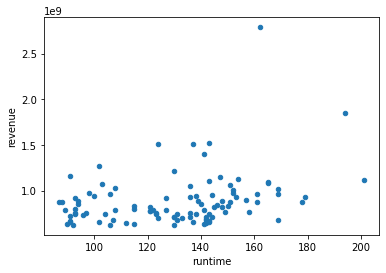

In [24]:
top_100_revenue.plot.scatter(x = 'runtime', y = 'revenue')

In [25]:
top_100_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 18
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        100 non-null    object 
 1   release_date  100 non-null    object 
 2   revenue       100 non-null    int64  
 3   runtime       100 non-null    float64
 4   title         100 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.7+ KB


<AxesSubplot:xlabel='runtime', ylabel='revenue'>

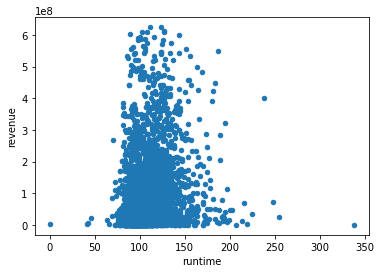

In [26]:
bottom_revenue = tmdb_new.sort_values(by='revenue', ascending=False)[100:]
bottom_revenue.plot.scatter(x = 'runtime', y = 'revenue')

# TN Data

In [27]:
#import the data
tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [28]:
#look at the data
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [29]:
#separate the month of the movie's release from the rest of the date
tn['release_month'] = pd.DatetimeIndex(tn['release_date']).month
tn['release_month']

0       12
1        5
2        6
3        5
4       12
        ..
5777    12
5778     4
5779     7
5780     9
5781     8
Name: release_month, Length: 5782, dtype: int64

In [30]:
#check for null values types of data for each column
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   release_month      5782 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 316.3+ KB


In [31]:
#remove any rows that have a domestic gross value of 0 or release month of 0 as those are equivalement to nulls
tn.drop(tn.query('domestic_gross == 0').index, inplace=True) and tn.drop(tn.query('release_month == 0').index, inplace=True)

In [32]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   release_month      5782 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 361.4+ KB


In [33]:
#change domestic gross from an object to an int

tn['dom_gross_clean'] = tn['domestic_gross'].str.replace('$','').str.replace(',','')
tn['dom_gross_clean'] = pd.to_numeric(tn['dom_gross_clean'])
tn['dom_gross_clean']

0       760507625
1       241063875
2        42762350
3       459005868
4       620181382
          ...    
5777            0
5778        48482
5779         1338
5780            0
5781       181041
Name: dom_gross_clean, Length: 5782, dtype: int64

In [34]:
#confirm that the dom_gross_clean is an integer
tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   release_month      5782 non-null   int64 
 7   dom_gross_clean    5782 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 406.5+ KB


In [35]:
#pull out the top 100 movies based on domestic gross revenue 
tn_top100 = tn.sort_values(by='dom_gross_clean', ascending=False)[:100]
tn_top100

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,dom_gross_clean
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",12,936662225
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",12,760507625
41,42,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566","$1,348,258,224",2,700059566
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",4,678815482
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944","$2,208,208,395",12,659363944
...,...,...,...,...,...,...,...,...
159,60,"May 15, 2003",The Matrix Reloaded,"$150,000,000","$281,553,689","$738,576,929",5,281553689
256,57,"Nov 18, 2011","The Twilight Saga: Breaking Dawn, Part 1","$127,500,000","$281,287,133","$689,420,051",11,281287133
842,43,"Dec 22, 2004",Meet the Fockers,"$60,000,000","$279,167,575","$516,567,575",12,279167575
1624,25,"Jun 5, 2009",The Hangover,"$35,000,000","$277,322,503","$465,764,086",6,277322503


In [36]:
#Get the value counts of how many of the top 100 movies came out each month, as a percentage
tn_top100_mc = tn_top100['release_month'].value_counts(normalize = True).sort_index()
tn_top100_mc

2     0.03
3     0.06
4     0.03
5     0.23
6     0.16
7     0.15
8     0.03
9     0.01
10    0.01
11    0.15
12    0.14
Name: release_month, dtype: float64

In [40]:
#Sort the rest of the movies based on domestic gross revenue 
tn_bottom = tn.sort_values(by='dom_gross_clean', ascending=False)[100:]
tn_bottom

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,dom_gross_clean
627,28,"Nov 9, 2018",Dr. Seussâ The Grinch,"$75,000,000","$270,620,950","$511,002,426",11,270620950
628,29,"Dec 21, 2016",Sing,"$75,000,000","$270,329,045","$634,454,789",12,270329045
52,53,"Jun 21, 2013",Monsters University,"$200,000,000","$268,488,329","$743,588,329",6,268488329
1082,83,"May 18, 2001",Shrek,"$50,000,000","$267,655,011","$491,812,794",5,267655011
629,30,"Jun 30, 2017",Despicable Me 3,"$75,000,000","$264,624,300","$1,034,727,750",6,264624300
...,...,...,...,...,...,...,...,...
2709,10,"Mar 31, 2004",The Touch,"$20,000,000",$0,"$5,918,742",3,0
2708,9,"Apr 13, 2010",Three Kingdoms: Resurrection of the Dragon,"$20,000,000",$0,"$22,139,590",4,0
2707,8,"Dec 31, 2012",Zambezia,"$20,000,000",$0,"$34,454,336",12,0
2706,7,"Dec 31, 2008",Admiral,"$20,000,000",$0,"$38,585,047",12,0


In [41]:
#Get the value counts of how many of the rest of the movies came out each month, as a percentage
tn_bottom_mc = tn_bottom['release_month'].value_counts(normalize = True).sort_index()
tn_bottom_mc

1     0.061070
2     0.068462
3     0.081661
4     0.079373
5     0.067582
6     0.081485
7     0.074798
8     0.086765
9     0.086589
10    0.100669
11    0.082893
12    0.128652
Name: release_month, dtype: float64

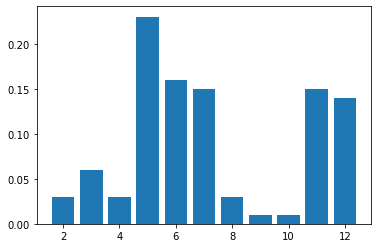

In [46]:
plt.bar(tn_top100_mc.index, tn_top100_mc.values);

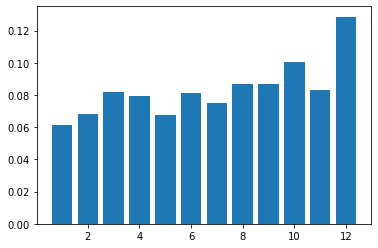

In [49]:
plt.bar(tn_bottom_mc.index, tn_bottom_mc.values);

In [69]:
x_axis = np.arange(len('release_month'))

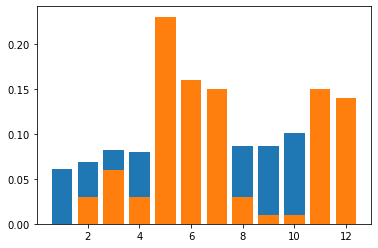

In [74]:
plt.bar(tn_bottom_mc.index, tn_bottom_mc.values)
plt.bar(tn_top100_mc.index, tn_top100_mc.values); 